#                               Mini Project (reducing traffic mortality)                                   #

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

% matplotlib inline

In [3]:
# read data

data_set_1 = pd.read_csv('C:\\Users\\Steven20367691\\Downloads\\road-accidents.csv', delimiter='|')

In [4]:
# check for nulls in road accidents

data_set_1.isnull().sum()

state                   0
drvr_fatl_col_bmiles    0
perc_fatl_speed         0
perc_fatl_alcohol       0
perc_fatl_1st_time      0
dtype: int64

In [5]:
# overview for road accidents

print('columns:\n', data_set_1.columns, end='\n\n')
print(data_set_1.describe())
data_set_1.head(10)

columns:
 Index(['state', 'drvr_fatl_col_bmiles', 'perc_fatl_speed', 'perc_fatl_alcohol',
       'perc_fatl_1st_time'],
      dtype='object')

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89
5,Colorado,13.6,37,28,95
6,Connecticut,10.8,46,36,82
7,Delaware,16.2,38,30,99
8,District of Columbia,5.9,34,27,100
9,Florida,17.9,21,29,94


In [6]:
# data info
data_set_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                   51 non-null object
drvr_fatl_col_bmiles    51 non-null float64
perc_fatl_speed         51 non-null int64
perc_fatl_alcohol       51 non-null int64
perc_fatl_1st_time      51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


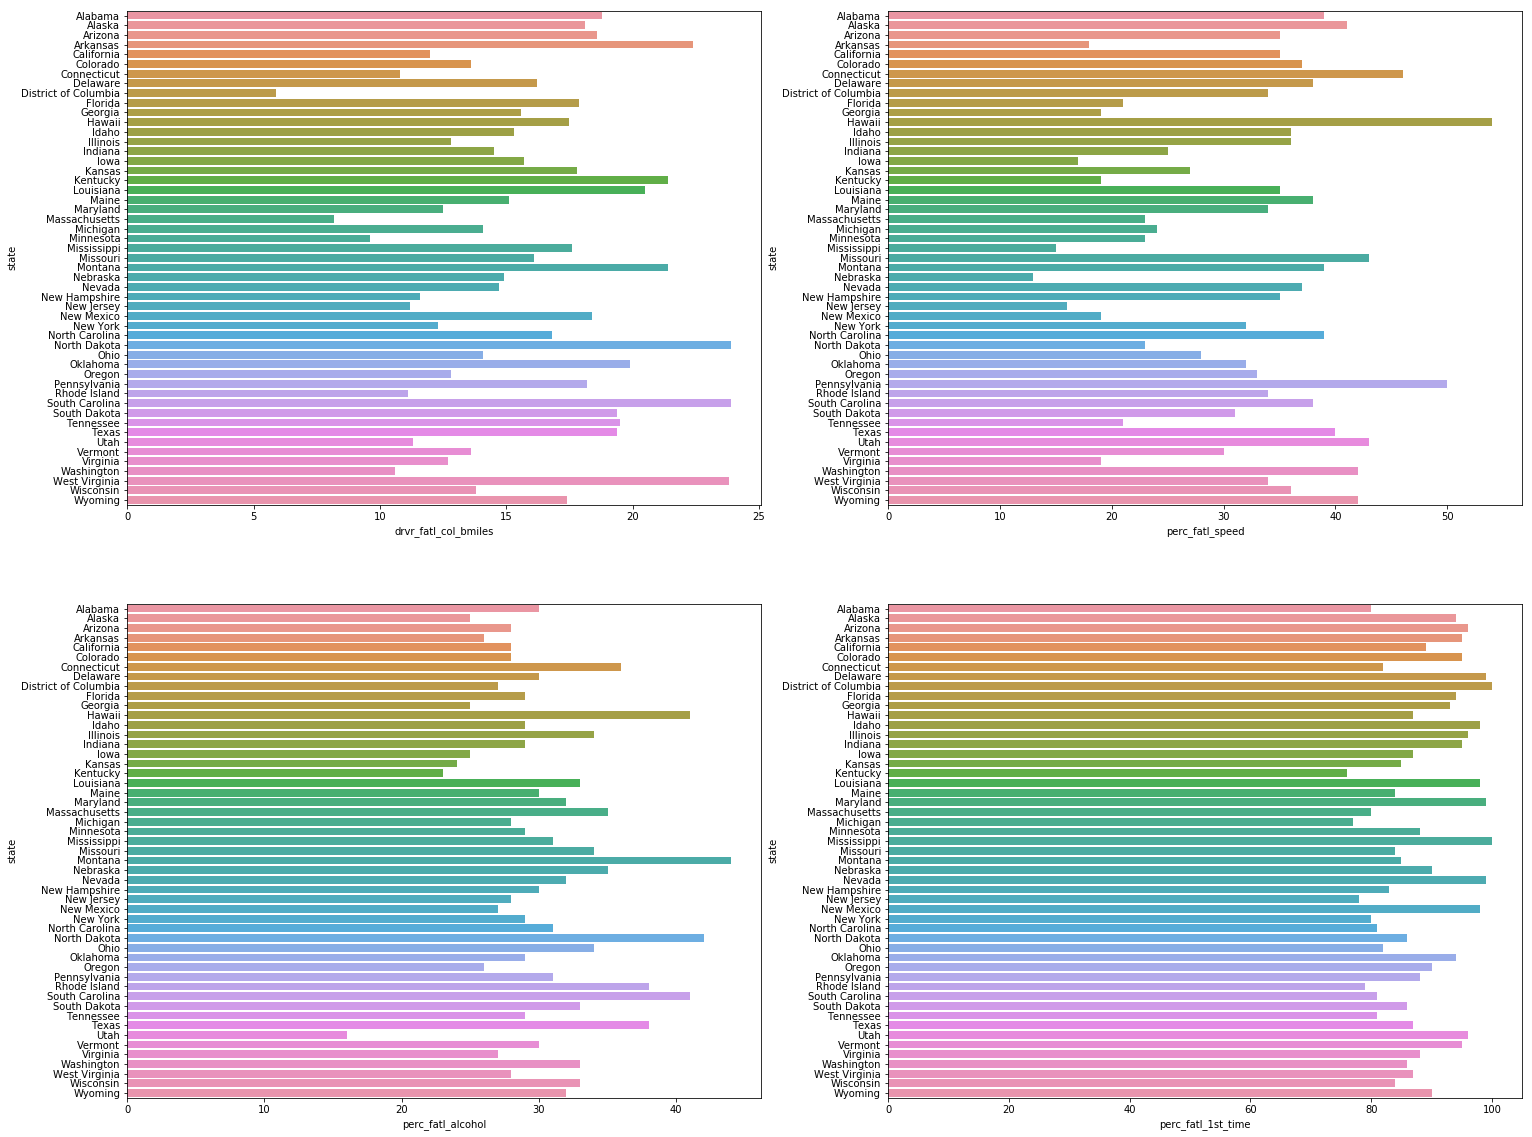

In [7]:
# Visualize road accidents data

fig, ax = plt.subplots(2, 2, figsize=(25, 20))

sns.barplot(x='drvr_fatl_col_bmiles', y='state',data=data_set_1, ax=ax[0][0])
sns.barplot(x='perc_fatl_speed', y='state', data=data_set_1, ax=ax[0][1])
sns.barplot(x='perc_fatl_alcohol', y='state', data=data_set_1, ax=ax[1][0])
sns.barplot(x='perc_fatl_1st_time', y='state', data=data_set_1, ax=ax[1][1])

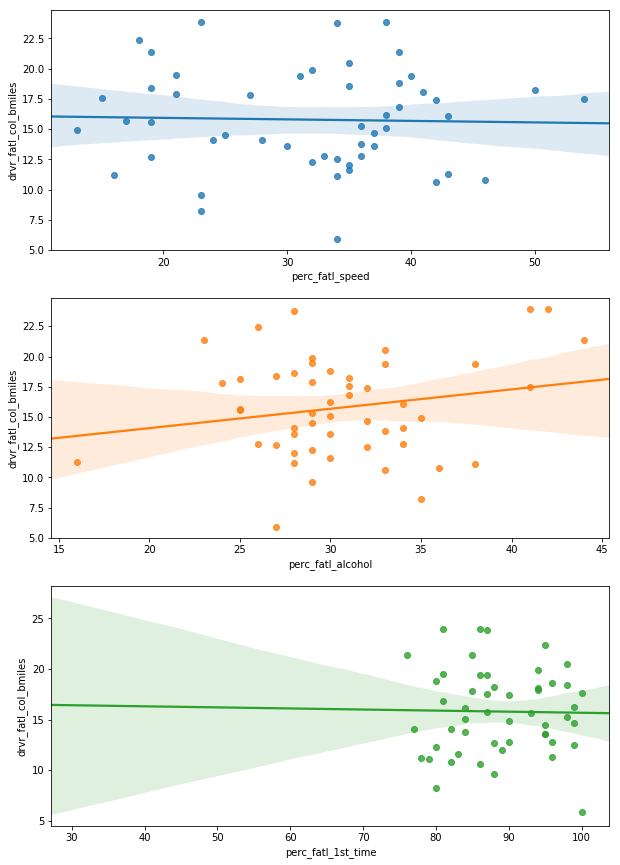

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

sns.regplot(x=data_set_1['perc_fatl_speed'], y=data_set_1['drvr_fatl_col_bmiles'], ax=ax[0])
sns.regplot(x=data_set_1['perc_fatl_alcohol'], y=data_set_1['drvr_fatl_col_bmiles'], ax=ax[1])
sns.regplot(x=data_set_1['perc_fatl_1st_time'], y=data_set_1['drvr_fatl_col_bmiles'], ax=ax[2])

In [9]:
# select features and target

X = data_set_1.iloc[:, 2:]
y = data_set_1.iloc[:, 1]

In [10]:
# split feature into training data and validation data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# create a linear model object
my_model = LinearRegression()

# fit the model
my_model.fit(X_train, y_train)

# check the model validation
preds = my_model.predict(X_valid)
print('labels:\n',y_valid)
print('predictions:\n', pd.Series(preds))

labels:
 3     22.4
26    21.4
24    17.6
30    11.2
4     12.0
14    14.5
11    17.5
9     17.9
1     18.1
25    16.1
44    11.3
Name: drvr_fatl_col_bmiles, dtype: float64
predictions:
 0     15.224925
1     16.986868
2     15.672875
3     16.095309
4     15.206525
5     15.367543
6     16.193811
7     15.508249
8     14.544892
9     15.826262
10    13.440240
dtype: float64


In [17]:
# calculate the score
mean_absolute_error(y_valid, preds)


2.9228850024208657

In [18]:
# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

# another way
my_scaler = StandardScaler()
another_X_scaled = my_scaler.fit_transform(X)

In [19]:
# create principal componants
pca = PCA(n_components=2)
X_pca = pca.fit_transform(another_X_scaled)

# convert to dataframe
componant_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

X_pca = pd.DataFrame(X_pca, columns=componant_names)
X_pca.head()

,PC1,PC2
0,0.884639,0.464211
1,-0.625299,-1.220247
2,-0.671696,-1.027863
3,-1.839546,0.239910
4,-0.211743,-0.256667


Text(0,0.5,'PC2')

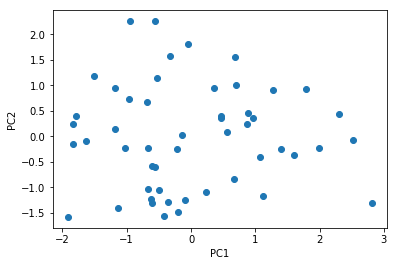

In [26]:
# Visualize the first two principal components

X_axis = X_pca.iloc[:, 0]
y_axis = X_pca.iloc[:, 1]
plt.scatter(X_axis, y_axis)
plt.xlabel('PC1')
plt.ylabel('PC2')

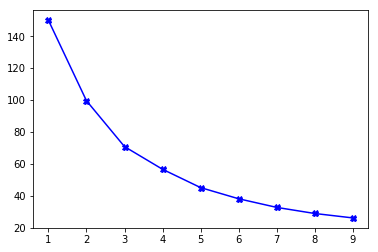

In [29]:
# visualize scree plot

K = range(1, 10)
sums = []
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(X_scaled)
    sums.append(k_means.inertia_)
    
plt.plot(K, sums, 'bX-')

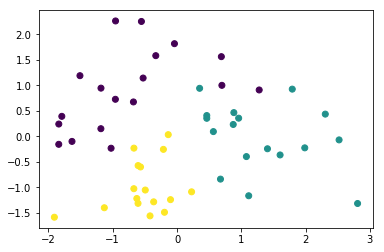

In [30]:
# create a clustering model
cluter_model = KMeans(n_clusters=3)
X_pca['Class'] = cluter_model.fit_predict(X)
X_pca['Class'] = X_pca['Class'].astype('category')

df_1 = X_pca.iloc[:, 0]
df_2 = X_pca.iloc[:, 1]

# display classes
plt.scatter(df_1, df_2, c=cluter_model.labels_)


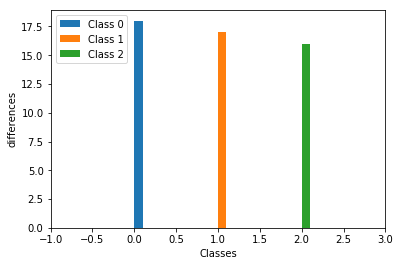

In [31]:
# visualize the differences between the cluters

plt.xlim([-1, 3])
plt.hist(x=X_pca['Class'][X_pca['Class'] == 0])
plt.hist(x=X_pca['Class'][X_pca['Class'] == 1])
plt.hist(x=X_pca['Class'][X_pca['Class'] == 2])
plt.xlabel('Classes')
plt.ylabel('differences')
plt.legend(['Class 0', 'Class 1', 'Class 2'])


In [32]:
# compute number of accidents within each cluster

data_set_2 = pd.read_csv('C:\\Users\\Steven20367691\\Downloads\\miles-driven.csv', delimiter='|')
data_set_1['miles driven'] = data_set_2['million_miles_annually']
data_set_1['Total fatal accident'] = data_set_2['million_miles_annually']*data_set_1['drvr_fatl_col_bmiles']/1000

data_set_1.groupby(X_pca['Class'])['Total fatal accident'].agg(['count', 'mean', 'sum'])


,count,mean,sum
Class,,,
0,18,990.046094,17820.8297
1,17,951.709165,16179.0558
2,16,727.207806,11635.3249


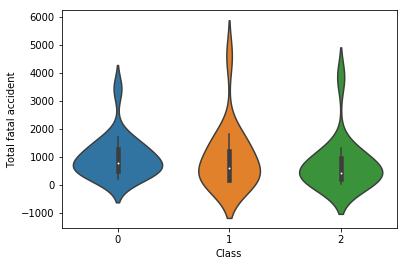

In [33]:
sns.violinplot(x=X_pca['Class'], y=data_set_1['Total fatal accident'])

##                         Make a decision when there is no clear right choice                                        ##

### Which cluster do you think should be a focus for policy intervention and further investigation ?

I think we should focus for policy intervention and further investigation on cluster 0.
